In [138]:
import pandas as pd
import requests
from lxml import html
from bs4 import BeautifulSoup
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import calendar
import re

import matplotlib.pyplot as plt
import seaborn as sb

In [139]:
url = "https://en.wikipedia.org/wiki/Dublin"
response = requests.get(url).text
soup = BeautifulSoup(response, 'lxml')
my_table = soup.find('table', {'class':'wikitable mw-collapsible'}) #wikitable mw-collapsible mw-made-collapsible
values = my_table.findAll('td')

In [98]:
climate = []
for value in values:
    climate.append(value.get_text())

In [99]:
count=0
df_temperature = pd.DataFrame()
while count < 12:
    df_temperature = df_temperature.append({'average_high_celsius' : climate[count], 'daily_mean_celsius' : climate[count+13], 'average_low_celsius' : climate[count+26], 'average_precipitation_mm' : climate[count+39], 'average_precipitation_days' : climate[count+52], 'average_relative_hummidity' : climate[count+65]} ,ignore_index=True)
    count += 1

In [100]:
df_temperature

,average_high_celsius,daily_mean_celsius,average_low_celsius,average_precipitation_mm,average_precipitation_days,average_relative_hummidity
0,17.5(63.5)\n,8.1(46.6)\n,5.3(41.5)\n,2.4(36.3)\n,−15.6(3.9)\n,62.6(2.46)\n
1,18.1(64.6)\n,8.3(46.9)\n,5.3(41.5)\n,2.3(36.1)\n,−13.4(7.9)\n,48.8(1.92)\n
2,23.4(74.1)\n,10.2(50.4)\n,6.8(44.2)\n,3.4(38.1)\n,−9.8(14.4)\n,52.7(2.07)\n
3,22.7(72.9)\n,12.1(53.8)\n,8.3(46.9)\n,4.6(40.3)\n,−7.2(19.0)\n,54.1(2.13)\n
4,26.8(80.2)\n,14.8(58.6)\n,10.9(51.6)\n,6.9(44.4)\n,−5.6(21.9)\n,59.5(2.34)\n
5,28.7(83.7)\n,17.6(63.7)\n,13.6(56.5)\n,9.6(49.3)\n,−0.7(30.7)\n,66.7(2.63)\n
6,33.1(91.6)\n,19.5(67.1)\n,15.6(60.1)\n,11.7(53.1)\n,1.8(35.2)\n,56.2(2.21)\n
7,30.6(87.1)\n,19.2(66.6)\n,15.3(59.5)\n,11.5(52.7)\n,0.6(33.1)\n,73.3(2.89)\n
8,27.6(81.7)\n,17.0(62.6)\n,13.4(56.1)\n,9.8(49.6)\n,−1.7(28.9)\n,59.5(2.34)\n
9,24.2(75.6)\n,13.6(56.5)\n,10.5(50.9)\n,7.3(45.1)\n,−5.6(21.9)\n,79.0(3.11)\n


In [101]:
df_temperature['average_high_celsius'] = df_temperature['average_high_celsius'].str.replace('\n','').str.replace(r"\(.*\)","")
df_temperature['average_low_celsius'] = df_temperature['average_low_celsius'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['average_precipitation_mm'] = df_temperature['average_precipitation_mm'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['daily_mean_celsius'] = df_temperature['daily_mean_celsius'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['average_relative_hummidity'] = df_temperature['average_relative_hummidity'].str.replace('\n','').str.replace(r"\(.*\)","")
df_temperature['average_precipitation_days'] = df_temperature['average_precipitation_days'].str.replace('\n','').str.replace(r"\(.*\)","")

df_temperature['Month'] = df_temperature.index + 1

In [102]:
df_temperature

,average_high_celsius,daily_mean_celsius,average_low_celsius,average_precipitation_mm,average_precipitation_days,average_relative_hummidity,Month
0,17.5,8.1,5.3,2.4,−15.6,62.6,1
1,18.1,8.3,5.3,2.3,−13.4,48.8,2
2,23.4,10.2,6.8,3.4,−9.8,52.7,3
3,22.7,12.1,8.3,4.6,−7.2,54.1,4
4,26.8,14.8,10.9,6.9,−5.6,59.5,5
5,28.7,17.6,13.6,9.6,−0.7,66.7,6
6,33.1,19.5,15.6,11.7,1.8,56.2,7
7,30.6,19.2,15.3,11.5,0.6,73.3,8
8,27.6,17.0,13.4,9.8,−1.7,59.5,9
9,24.2,13.6,10.5,7.3,−5.6,79.0,10


In [103]:
df_temperature["average_precipitation_days"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_temperature["average_precipitation_days"]]
df_temperature["average_precipitation_days"] = df_temperature["average_precipitation_days"].astype(float)

# df_full["average_high_celsius"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_full["average_high_celsius"]]
df_temperature["average_high_celsius"] = df_temperature["average_high_celsius"].astype(float)

# df_full["daily_mean_celsius"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_full["daily_mean_celsius"]]
df_temperature["daily_mean_celsius"] = df_temperature["daily_mean_celsius"].astype(float)

# df_full["average_low_celsius"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_full["average_low_celsius"]]
df_temperature["average_low_celsius"] = df_temperature["average_low_celsius"].astype(float)

# df_full["average_precipitation_mm"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_full["average_precipitation_mm"]]
df_temperature["average_precipitation_mm"] = df_temperature["average_precipitation_mm"].astype(float)

# df_full["average_relative_hummidity"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_full["average_relative_hummidity"]]
df_temperature["average_relative_hummidity"] = df_temperature["average_relative_hummidity"].astype(float)

df_temperature = df_temperature.drop(df_temperature.columns[[0,2,3,4]], axis=1)
df_temperature

,daily_mean_celsius,average_relative_hummidity,Month
0,8.1,62.6,1
1,8.3,48.8,2
2,10.2,52.7,3
3,12.1,54.1,4
4,14.8,59.5,5
5,17.6,66.7,6
6,19.5,56.2,7
7,19.2,73.3,8
8,17.0,59.5,9
9,13.6,79.0,10


In [104]:
df_temperature.dtypes

daily_mean_celsius            float64
average_relative_hummidity    float64
Month                           int64
dtype: object

In [105]:
tourist_Ireland_df = pd.read_csv("updated_tourism.csv")
tourist_Ireland_df

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010 January,Other UK (1),Arrivals,Thousand,0.9
2,Air and Sea Travel,2010 January,Belgium,Arrivals,Thousand,12.5
3,Air and Sea Travel,2010 January,Germany,Arrivals,Thousand,45.3
4,Air and Sea Travel,2010 January,Spain,Arrivals,Thousand,68.6
...,...,...,...,...,...,...
2596,Air and Sea Travel,2022 September,Other Europe (34),Arrivals,Thousand,17.5
2597,Air and Sea Travel,2022 September,United States,Arrivals,Thousand,173.2
2598,Air and Sea Travel,2022 September,Other Transatlantic Countries(1),Arrivals,Thousand,33.0
2599,Air and Sea Travel,2022 September,United Arab Emirates,Arrivals,Thousand,28.9


In [106]:
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[0], axis = 1)
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[2], axis=1)
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[2], axis=1)
tourist_Ireland_df

,Month,Country,VALUE
0,2010 January,Great Britain,361.5
1,2010 January,Other UK (1),0.9
2,2010 January,Belgium,12.5
3,2010 January,Germany,45.3
4,2010 January,Spain,68.6
...,...,...,...
2596,2022 September,Other Europe (34),17.5
2597,2022 September,United States,173.2
2598,2022 September,Other Transatlantic Countries(1),33.0
2599,2022 September,United Arab Emirates,28.9


In [107]:
# tourist_Ireland_df = tourist_Ireland_df.rename(columns={'Area of Residence': 'Country'})

In [108]:
tourist_Ireland_df["VALUE"] = (tourist_Ireland_df["VALUE"]*1000)

In [109]:
tourist_Ireland_df

,Month,Country,VALUE
0,2010 January,Great Britain,361500.0
1,2010 January,Other UK (1),900.0
2,2010 January,Belgium,12500.0
3,2010 January,Germany,45300.0
4,2010 January,Spain,68600.0
...,...,...,...
2596,2022 September,Other Europe (34),17500.0
2597,2022 September,United States,173200.0
2598,2022 September,Other Transatlantic Countries(1),33000.0
2599,2022 September,United Arab Emirates,28900.0


In [110]:
tourist_Ireland_df['Year'] = tourist_Ireland_df['Month'].str.slice(start=0, stop=4)

In [111]:
tourist_Ireland_df['Month'] = tourist_Ireland_df['Month'].str.slice(start=5)
tourist_Ireland_df

,Month,Country,VALUE,Year
0,January,Great Britain,361500.0,2010
1,January,Other UK (1),900.0,2010
2,January,Belgium,12500.0,2010
3,January,Germany,45300.0,2010
4,January,Spain,68600.0,2010
...,...,...,...,...
2596,September,Other Europe (34),17500.0,2022
2597,September,United States,173200.0,2022
2598,September,Other Transatlantic Countries(1),33000.0,2022
2599,September,United Arab Emirates,28900.0,2022


In [112]:
# tourist_Ireland_df=tourist_Ireland_df.drop(index=tourist_Ireland_df.index[-100:])
# tourist_Ireland_df

In [113]:
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Countries(42)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Europe (34)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Transatlantic Countries(1)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other UK (1)')].index, inplace=True)

In [114]:
print(tourist_Ireland_df)

          Month               Country     VALUE  Year
0       January         Great Britain  361500.0  2010
2       January               Belgium   12500.0  2010
3       January               Germany   45300.0  2010
4       January                 Spain   68600.0  2010
5       January                France   48900.0  2010
...         ...                   ...       ...   ...
2592  September                Poland   39900.0  2022
2593  September              Portugal   82500.0  2022
2595  September           Switzerland   23200.0  2022
2597  September         United States  173200.0  2022
2599  September  United Arab Emirates   28900.0  2022

[1836 rows x 4 columns]


In [115]:
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'Great Britain'].index, 'Country'] = 'UK'
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'United States'].index, 'Country'] = 'US'
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'United Arab Emirates'].index, 'Country'] = 'UAE'
tourist_Ireland_df

,Month,Country,VALUE,Year
0,January,UK,361500.0,2010
2,January,Belgium,12500.0,2010
3,January,Germany,45300.0,2010
4,January,Spain,68600.0,2010
5,January,France,48900.0,2010
...,...,...,...,...
2592,September,Poland,39900.0,2022
2593,September,Portugal,82500.0,2022
2595,September,Switzerland,23200.0,2022
2597,September,US,173200.0,2022


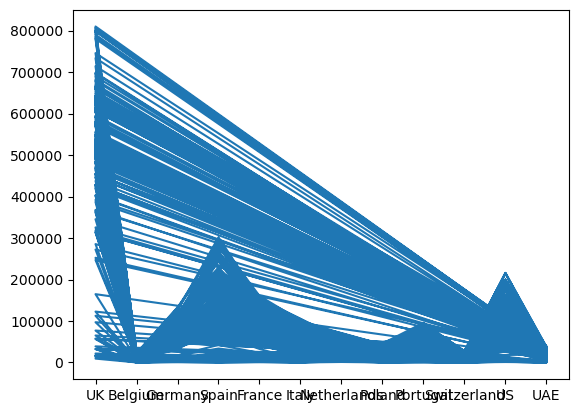

In [116]:
def country_origin(csv_file, country):
    df = pd.read_csv(csv_file).reset_index()
    df['Country'] = country
    df = df.drop(df.columns[0], axis = 1)
    df = df.drop(df.columns[0], axis=1)
    return df
    
df_trend_Belgium = country_origin('GoogleTrends/Belgium_Irelandby_month.csv','Belgium')
df_trend_Poland = country_origin('GoogleTrends/Poland_Irelandby_month.csv','Poland')
df_trend_Portugal = country_origin('GoogleTrends/Portugal_Irelandby_month.csv','Portugal')
df_trend_France = country_origin('GoogleTrends/France_Irelandby_month.csv','France')
df_trend_Germany = country_origin('GoogleTrends/German_Irelandby_month.csv','Germany')
df_trend_Italy = country_origin('GoogleTrends/Italy_Irelandby_month.csv','Italy')
df_trend_Spain = country_origin('GoogleTrends/Spain_Irelandby_month.csv','Spain')
df_trend_UK = country_origin('GoogleTrends/UK_Irelandby_month.csv','UK')
df_trend_US = country_origin('GoogleTrends/US_Irelandby_month.csv','US')
df_trend_Switzerland = country_origin('GoogleTrends/Switzerland_Irelandby_month.csv','Switzerland')
df_trend_Netherlands = country_origin('GoogleTrends/Netherlands_Irelandby_month.csv','Netherlands')
df_trend_UAE = country_origin('GoogleTrends/UAE_Irelandby_month.csv','UAE')

df_trend = pd.concat([df_trend_Belgium, df_trend_Poland, df_trend_Portugal, df_trend_France, df_trend_Germany, df_trend_Italy, df_trend_Spain, df_trend_UK, df_trend_US, df_trend_Switzerland, df_trend_Netherlands, df_trend_UAE])
df_trend

,Year,Month,Count,Country
0,2010,1,0,Belgium
1,2010,2,0,Belgium
2,2010,3,54,Belgium
3,2010,4,0,Belgium
4,2010,5,37,Belgium
...,...,...,...,...
151,2022,8,0,UAE
152,2022,9,0,UAE
153,2022,10,0,UAE
154,2022,11,0,UAE


In [117]:
df_trend.loc[df_trend[df_trend['Count'] == 0].index, 'Count'] = None
df_trend

,Year,Month,Count,Country
0,2010,1,NaN,Belgium
1,2010,2,NaN,Belgium
2,2010,3,54.0,Belgium
3,2010,4,NaN,Belgium
4,2010,5,NaN,Belgium
...,...,...,...,...
151,2022,8,NaN,UAE
152,2022,9,NaN,UAE
153,2022,10,NaN,UAE
154,2022,11,NaN,UAE


In [118]:
df_trend['Count'].fillna(method='bfill', inplace=True)
df_trend['Count'].fillna(method='ffill', inplace=True)

In [119]:
df_trend

,Year,Month,Count,Country
0,2010,1,54.0,Belgium
1,2010,2,54.0,Belgium
2,2010,3,54.0,Belgium
3,2010,4,14.0,Belgium
4,2010,5,14.0,Belgium
...,...,...,...,...
151,2022,8,21.0,UAE
152,2022,9,21.0,UAE
153,2022,10,21.0,UAE
154,2022,11,21.0,UAE


In [120]:
df_trend.drop((df_trend[(df_trend["Year"] > 2021) & (df_trend["Month"] > 9)]).index, inplace = True)

In [121]:
df_trend

,Year,Month,Count,Country
0,2010,1,54.0,Belgium
1,2010,2,54.0,Belgium
2,2010,3,54.0,Belgium
3,2010,4,14.0,Belgium
4,2010,5,14.0,Belgium
...,...,...,...,...
148,2022,5,21.0,UAE
149,2022,6,21.0,UAE
150,2022,7,21.0,UAE
151,2022,8,21.0,UAE


In [122]:
# frames = [df_tourist_full, tourist_Ireland_df]

In [123]:
# result = pd.concat(frames)
# result.to_csv('final_merged_data.csv')

In [124]:
tourist_Ireland_df['Month'] = tourist_Ireland_df['Month'].apply(lambda x: datetime.strptime(x, '%B').month)

In [125]:
tourist_Ireland_df["Year"] = (tourist_Ireland_df["Year"]).astype(int)
tourist_Ireland_df

,Month,Country,VALUE,Year
0,1,UK,361500.0,2010
2,1,Belgium,12500.0,2010
3,1,Germany,45300.0,2010
4,1,Spain,68600.0,2010
5,1,France,48900.0,2010
...,...,...,...,...
2592,9,Poland,39900.0,2022
2593,9,Portugal,82500.0,2022
2595,9,Switzerland,23200.0,2022
2597,9,US,173200.0,2022


In [126]:
#Megring code
df_tourist_full = pd.merge(df_trend, df_temperature, how='left', on=['Month'])
# df_tourist_full = pd.concat(df_tourist_full, tourist_Ireland_df , how = 'left', on = ['Country', 'Month'])
# frames = [df_tourist_full, tourist_Ireland_df]
# result = pd.concat(frames)
# result.to_csv('final_merged_data.csv')
df_tourist_full

,Year,Month,Count,Country,daily_mean_celsius,average_relative_hummidity
0,2010,1,54.0,Belgium,8.1,62.6
1,2010,2,54.0,Belgium,8.3,48.8
2,2010,3,54.0,Belgium,10.2,52.7
3,2010,4,14.0,Belgium,12.1,54.1
4,2010,5,14.0,Belgium,14.8,59.5
...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,14.8,59.5
1832,2022,6,21.0,UAE,17.6,66.7
1833,2022,7,21.0,UAE,19.5,56.2
1834,2022,8,21.0,UAE,19.2,73.3


In [127]:
df_tourist_full = pd.merge(df_tourist_full, tourist_Ireland_df, how='inner', on=['Country', 'Month', 'Year'])
df_tourist_full

,Year,Month,Count,Country,daily_mean_celsius,average_relative_hummidity,VALUE
0,2010,1,54.0,Belgium,8.1,62.6,12500.0
1,2010,2,54.0,Belgium,8.3,48.8,14300.0
2,2010,3,54.0,Belgium,10.2,52.7,16300.0
3,2010,4,14.0,Belgium,12.1,54.1,10200.0
4,2010,5,14.0,Belgium,14.8,59.5,12200.0
...,...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,14.8,59.5,16600.0
1832,2022,6,21.0,UAE,17.6,66.7,17500.0
1833,2022,7,21.0,UAE,19.5,56.2,21700.0
1834,2022,8,21.0,UAE,19.2,73.3,20800.0


In [128]:
df_tourist_full.dtypes

Year                            int64
Month                           int64
Count                         float64
Country                        object
daily_mean_celsius            float64
average_relative_hummidity    float64
VALUE                         float64
dtype: object

In [129]:
tourist_Ireland_df.dtypes

Month        int64
Country     object
VALUE      float64
Year         int32
dtype: object

In [130]:
df_tourist_full.to_csv('Final_Merged_data_corr.csv')

In [131]:
sample = pd.read_csv('Final_Merged_data_corr.csv')
sample

,Unnamed: 0,Year,Month,Count,Country,daily_mean_celsius,average_relative_hummidity,VALUE
0,0,2010,1,54.0,Belgium,8.1,62.6,12500.0
1,1,2010,2,54.0,Belgium,8.3,48.8,14300.0
2,2,2010,3,54.0,Belgium,10.2,52.7,16300.0
3,3,2010,4,14.0,Belgium,12.1,54.1,10200.0
4,4,2010,5,14.0,Belgium,14.8,59.5,12200.0
...,...,...,...,...,...,...,...,...
1831,1831,2022,5,21.0,UAE,14.8,59.5,16600.0
1832,1832,2022,6,21.0,UAE,17.6,66.7,17500.0
1833,1833,2022,7,21.0,UAE,19.5,56.2,21700.0
1834,1834,2022,8,21.0,UAE,19.2,73.3,20800.0


In [132]:
visitors = sample["VALUE"]
visitors = pd.DataFrame(visitors)
visitors.to_csv('available_output_corr.csv')

In [133]:
sample = sample.drop(sample.columns[7], axis=1)
sample

,Unnamed: 0,Year,Month,Count,Country,daily_mean_celsius,average_relative_hummidity
0,0,2010,1,54.0,Belgium,8.1,62.6
1,1,2010,2,54.0,Belgium,8.3,48.8
2,2,2010,3,54.0,Belgium,10.2,52.7
3,3,2010,4,14.0,Belgium,12.1,54.1
4,4,2010,5,14.0,Belgium,14.8,59.5
...,...,...,...,...,...,...,...
1831,1831,2022,5,21.0,UAE,14.8,59.5
1832,1832,2022,6,21.0,UAE,17.6,66.7
1833,1833,2022,7,21.0,UAE,19.5,56.2
1834,1834,2022,8,21.0,UAE,19.2,73.3


In [134]:
sample.dtypes

Unnamed: 0                      int64
Year                            int64
Month                           int64
Count                         float64
Country                        object
daily_mean_celsius            float64
average_relative_hummidity    float64
dtype: object

In [135]:
df_full = pd.get_dummies(sample)
df_full = df_full.drop(df_full.columns[0], axis=1)
df_full.to_csv('available_input_corr.csv')

In [136]:
df_full.isna().sum()

Year                          0
Month                         0
Count                         0
daily_mean_celsius            0
average_relative_hummidity    0
Country_Belgium               0
Country_France                0
Country_Germany               0
Country_Italy                 0
Country_Netherlands           0
Country_Poland                0
Country_Portugal              0
Country_Spain                 0
Country_Switzerland           0
Country_UAE                   0
Country_UK                    0
Country_US                    0
dtype: int64

In [137]:
df_full

,Year,Month,Count,daily_mean_celsius,average_relative_hummidity,Country_Belgium,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,2010,1,54.0,8.1,62.6,1,0,0,0,0,0,0,0,0,0,0,0
1,2010,2,54.0,8.3,48.8,1,0,0,0,0,0,0,0,0,0,0,0
2,2010,3,54.0,10.2,52.7,1,0,0,0,0,0,0,0,0,0,0,0
3,2010,4,14.0,12.1,54.1,1,0,0,0,0,0,0,0,0,0,0,0
4,2010,5,14.0,14.8,59.5,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2022,5,21.0,14.8,59.5,0,0,0,0,0,0,0,0,0,1,0,0
1832,2022,6,21.0,17.6,66.7,0,0,0,0,0,0,0,0,0,1,0,0
1833,2022,7,21.0,19.5,56.2,0,0,0,0,0,0,0,0,0,1,0,0
1834,2022,8,21.0,19.2,73.3,0,0,0,0,0,0,0,0,0,1,0,0
